<a href="https://colab.research.google.com/github/SridharSurapaneni07/AAI-510-Group-7/blob/main/Final_Project_AAI_510_Group_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI-510 Final Team Project: Smart Farming (Crop Health Monitoring & Environmental Stress Assessment)

## Team Number:
- AAI-510 Group 7

## Team Members:
- Deepak Sindhe
- Narendra Iyer
- Sridhar Surapaneni

This notebook serves as the technical documentation for the Smart Farming project, which aims to develop a machine learning-based solution for crop health monitoring and environmental stress assessment. It is intended for the technical committee, including fellow ML Engineers, Data Engineers, Architects, ML managers, and the Head of Machine Learning.

The project addresses real-world challenges in precision agriculture, such as crop yield loss, water overuse, and unanticipated environmental shifts, by providing data-driven insights for improved productivity and resource conservation.



## 1. Problem Statement and Justification for the Proposed Approach

### Problem Statement:
- The agriculture industry faces increasing challenges from climate variability, soil degradation, and resource scarcity, leading to a critical need for data-driven solutions to monitor crop health and proactively respond to environmental stress. The business problem is to develop predictive models that can identify early signs of crop stress, classify crop health status, and provide actionable insights for precision agriculture, thereby improving crop outcomes and optimizing resource use.

### Justification for the Proposed Approach:
Our approach leverages machine learning to analyze environmental and soil conditions to:
1. Classify crop health based on various environmental and soil parameters.
2. Detect environmental stress factors such as drought, nutrient imbalance, or pest pressure.
3. Inform resource optimization strategies like irrigation scheduling and fertilizer planning.

This project directly aligns with the business needs in agricultural technology (AgTech) by enabling smarter resource planning and improving crop outcomes.  The chosen dataset, 'Crop_recommendationV2.csv', provides the necessary features for building these predictive models.



## 2. Data Understanding (EDA) - Narendra Iyer's Responsibilities

Narendra Iyer is responsible for handling data preprocessing, cleaning, transformation, and conducting exploratory data analysis (EDA) and visualizing key trends.

### 2.1 Load Data and Initial Inspection

In [ ]:
# Import packages

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split




In [ ]:
# Load the dataset
try:
    df = pd.read_csv('Crop_recommendationV2.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Crop_recommendationV2.csv' not found. Please ensure the file is in the correct directory.")
    # Exit or handle the error appropriately
    exit()

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for unique values in the target variable 'label'
print("\nUnique crop labels:")
print(df['label'].unique())
print(f"Number of unique crop labels: {df['label'].nunique()}")



Dataset loaded successfully.

First 5 rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   soil_moisture  soil_type  ...  organic_matter  irrigation_frequency  \
0      29.446064          2  ...        3.121395                     4   
1      12.851183          3  ...        2.142021                     4   
2      29.363913          2  ...        1.474974                     1   
3      26.207732          3  ...        8.393907                     1   
4      28.236236          2  ...        5.202285                     3   

   crop_density  pest_pressure  fertilizer_usage  growth_stage  \
0     11.743910

### 2.2 Graphical Representation of Relationships


Histograms of numerical features:


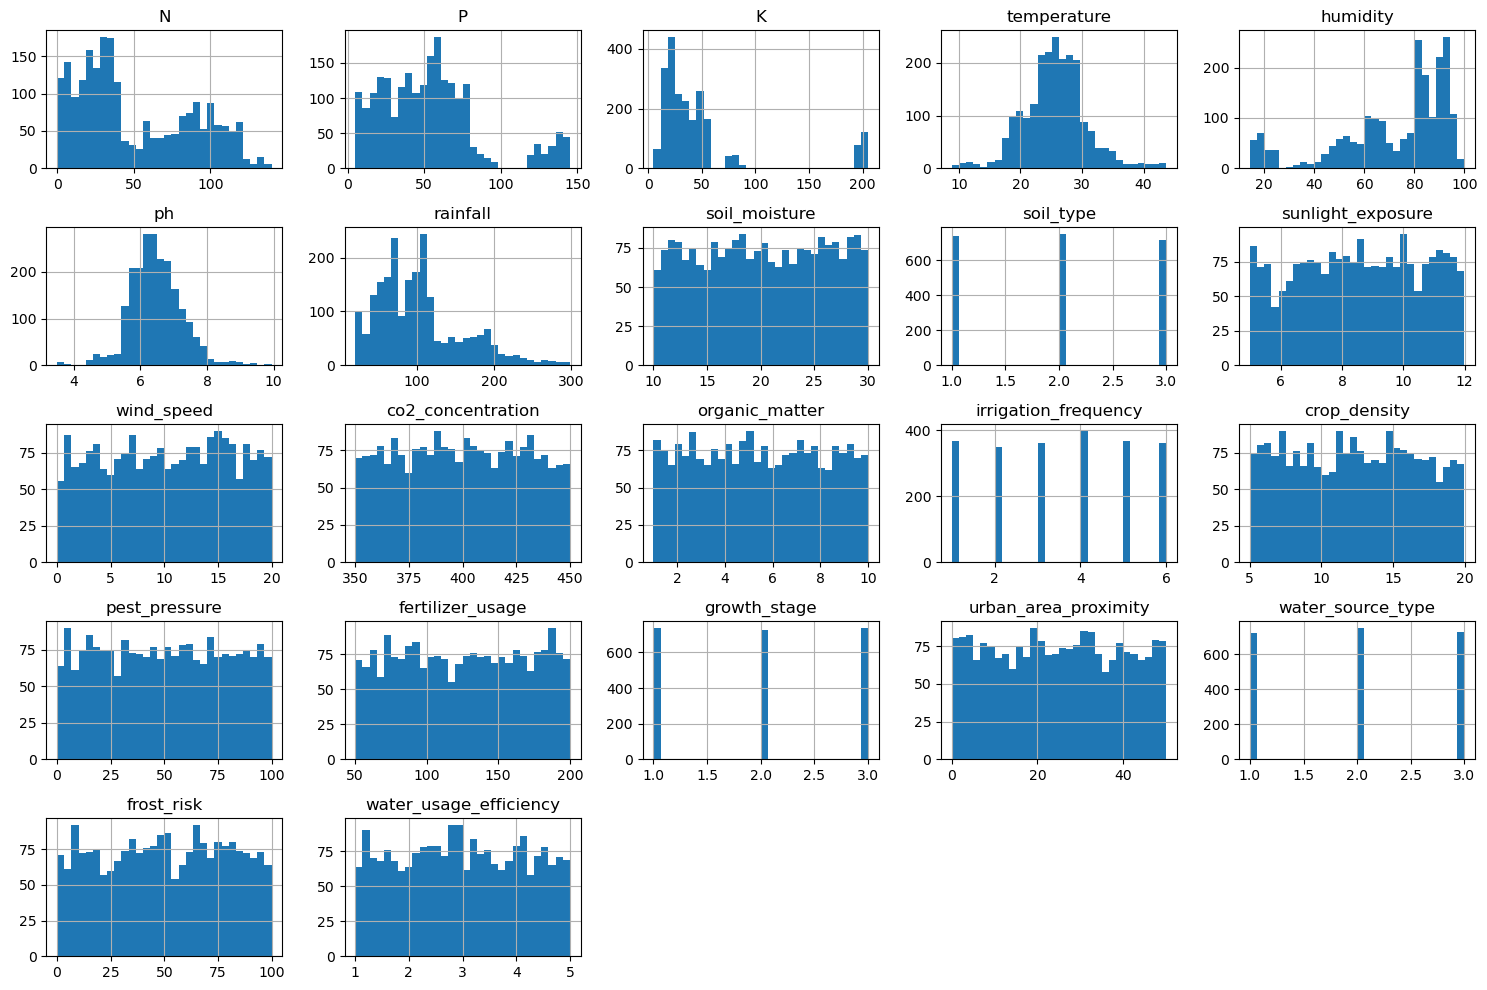

In [ ]:
# Histograms for numerical features
print("\nHistograms of numerical features:")
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()




Correlation matrix heatmap:


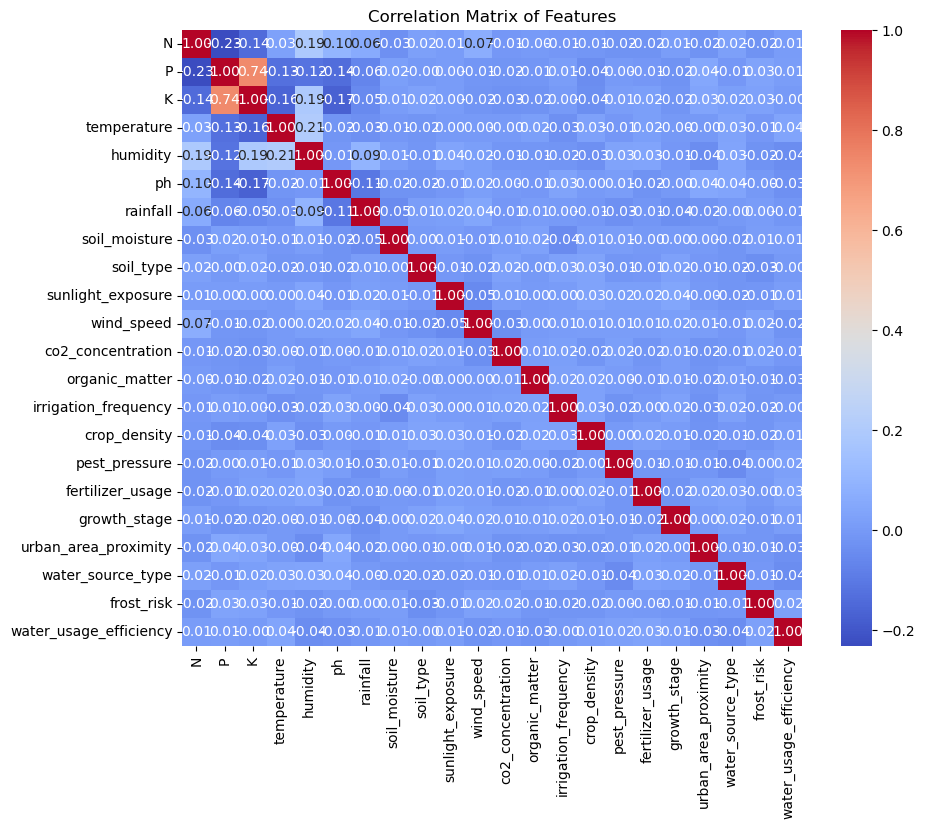

In [ ]:
# Correlation matrix heatmap
print("\nCorrelation matrix heatmap:")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()




Box plots of numerical features by crop label:


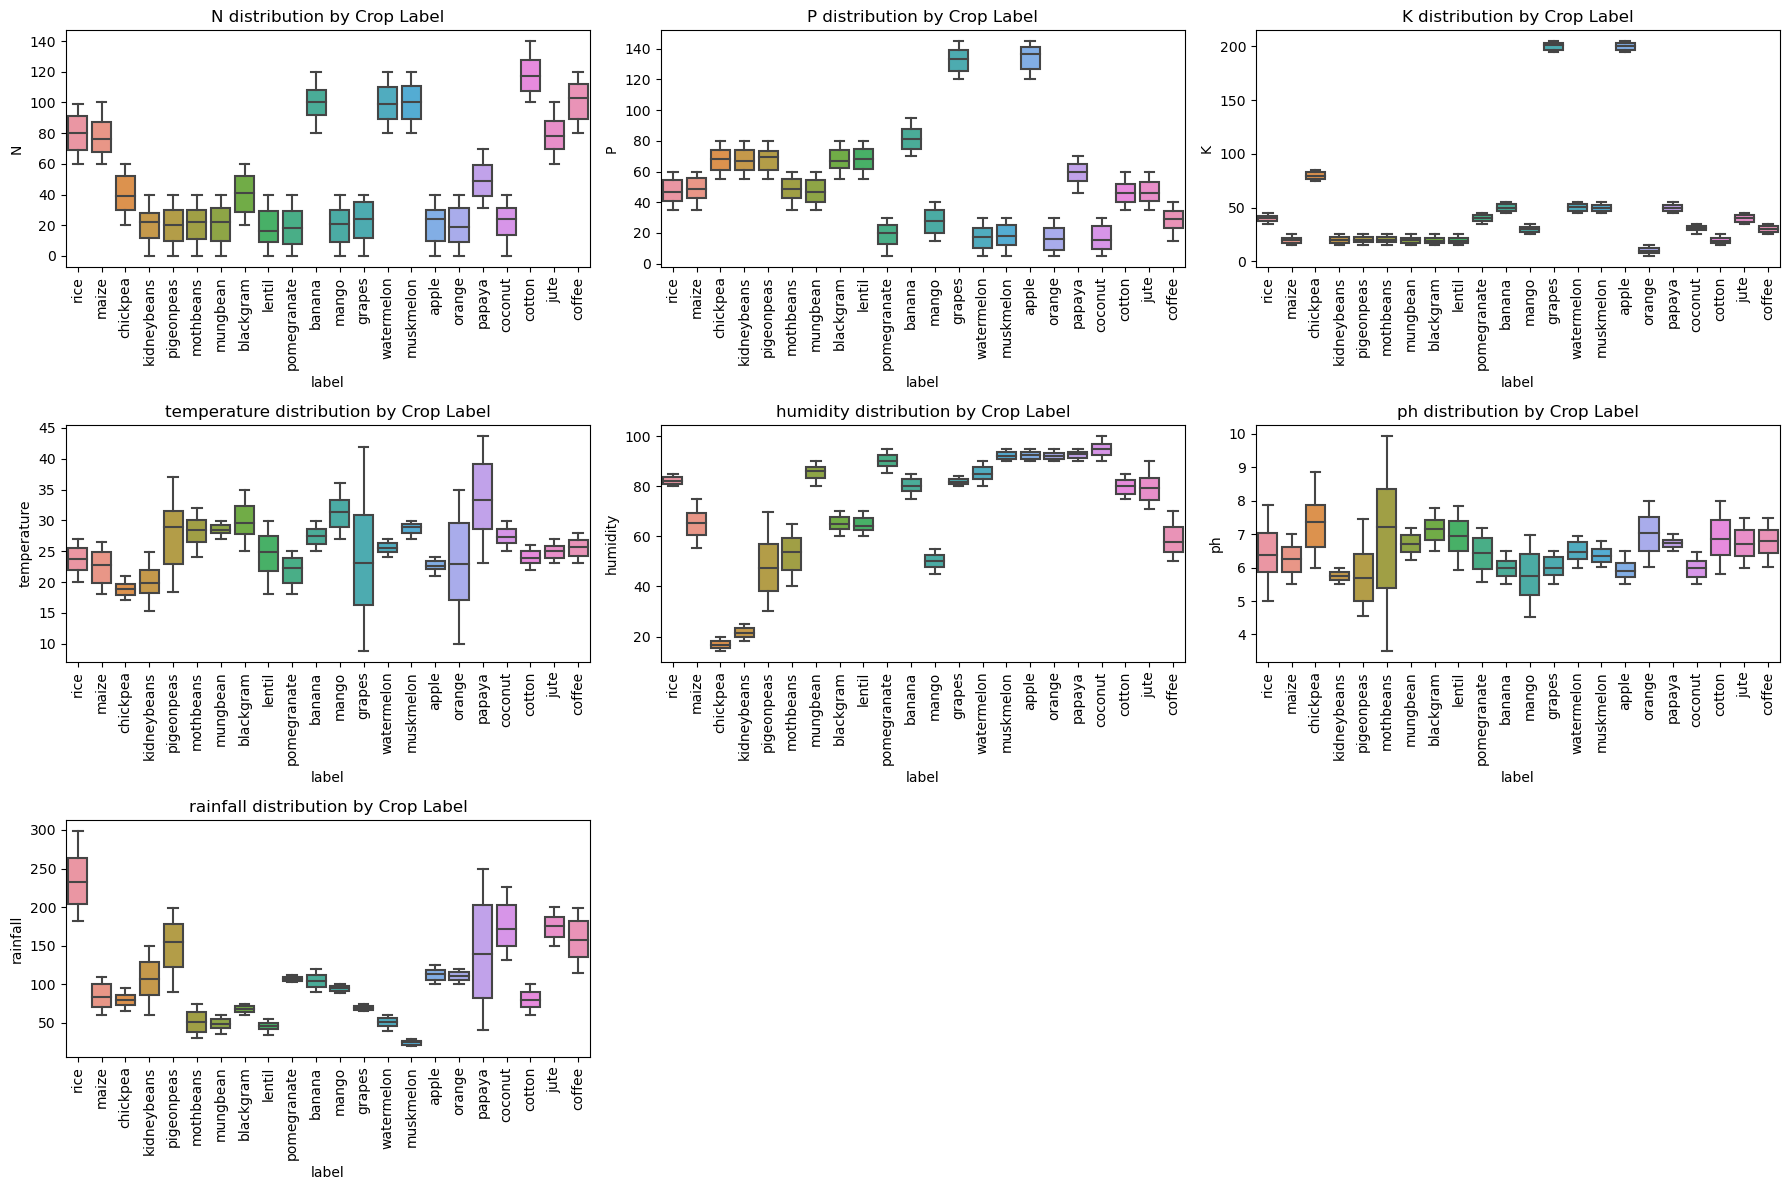

In [ ]:
# Box plots to show distribution of features across different crop labels
print("\nBox plots of numerical features by crop label:")
plt.figure(figsize=(18, 12))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'{col} distribution by Crop Label')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



### 2.3 Non-Graphical Representation of Relationships

In [ ]:
# Group by 'label' and calculate mean of features
print("\nMean of features grouped by crop label:")
print(df.groupby('label').mean(numeric_only=True))

# Group by 'label' and calculate median of features
print("\nMedian of features grouped by crop label:")
print(df.groupby('label').median(numeric_only=True))




Mean of features grouped by crop label:
                  N       P       K  temperature   humidity        ph  \
label                                                                   
apple         20.80  134.22  199.89    22.630942  92.333383  5.929663   
banana       100.23   82.01   50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47   19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79   79.92    18.872847  16.860439  7.336957   
coconut       21.98   16.93   30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74   29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24   19.56    23.988958  79.843474  6.912675   
grapes        23.18  132.53  200.11    23.849575  81.875228  6.025937   
jute          78.40   46.86   39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36   19.41    24.509052  64.804785  6.927932   
maize     

Further insights from EDA (inference, actionable insight, recommendations):
- The dataset appears clean with no missing values, simplifying the data preparation phase.
- From the correlation matrix and pairplots, we can observe varying relationships between environmental factors and different crop types. For instance, some crops might thrive in high humidity while others prefer drier conditions. This initial understanding will guide feature engineering and model selection.
- The distribution of features across different crop labels indicates that each crop has a specific range of optimal conditions, which is crucial for classification.




## 3. Data Preparation & Feature Engineering - Narendra Iyer's Responsibilities
Narendra Iyer is also responsible for engineering new features (e.g., Temperature-Humidity Index, Nutrient Balance Ratio) and ensuring data quality.


### 3.1 Handling Missing Values and Outliers (if any)

In [ ]:
# As checked in EDA, there are no missing values.
print("\nChecking for missing values again before processing:")
print(df.isnull().sum().sum())
if df.isnull().sum().sum() == 0:
    print("No missing values found in the dataset.")
else:
    # Example of handling missing values (imputation, dropping rows/columns)
    # df.fillna(df.mean(), inplace=True) # Impute with mean
    # df.dropna(inplace=True) # Drop rows with missing values
    print("Missing values handled (if any were present based on EDA).")

# Outlier detection and handling (e.g., using IQR, Z-score)
# For this project, we'll focus on the raw feature values, but in a real-world scenario,
# outliers could be capped or transformed.
print("\nChecking for outliers (using Z-score as an example, though not strictly removing them for this demo):")



Checking for missing values again before processing:
0
No missing values found in the dataset.

Checking for outliers (using Z-score as an example, though not strictly removing them for this demo):


In [ ]:
# Calculate Z-scores for numerical columns
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in numerical_cols:
    df[f'{col}_zscore'] = np.abs(zscore(df[col]))
    # Identify potential outliers (e.g., Z-score > 3)
    outliers_count = df[df[f'{col}_zscore'] > 3].shape[0]
    if outliers_count > 0:
        print(f"Column '{col}': {outliers_count} potential outliers (Z-score > 3).")
    else:
        print(f"Column '{col}': No significant outliers (Z-score > 3) detected.")
# Drop the zscore columns as they were just for detection
df = df.drop(columns=[f'{col}_zscore' for col in numerical_cols])



Column 'N': No significant outliers (Z-score > 3) detected.
Column 'P': No significant outliers (Z-score > 3) detected.
Column 'K': 94 potential outliers (Z-score > 3).
Column 'temperature': 33 potential outliers (Z-score > 3).
Column 'humidity': No significant outliers (Z-score > 3) detected.
Column 'ph': 30 potential outliers (Z-score > 3).
Column 'rainfall': 22 potential outliers (Z-score > 3).


### 3.2 Feature Engineering
Engineer new features to potentially improve model performance and capture more complex relationships.
1. Temperature-Humidity Index (THI):
- THI is often used in agriculture to assess environmental stress. A simplified formula is THI = T - (0.55 - 0.55 * RH/100) * (T - 58) where T is temperature in Fahrenheit and RH is humidity in %.
- Our temperature is in Celsius, so we'll use a more common approximation or create a composite.


In [ ]:
# Let's create a simpler interaction term for now:
df['Temp_Humidity_Interaction'] = df['temperature'] * df['humidity']
print("\n'Temp_Humidity_Interaction' feature created.")




'Temp_Humidity_Interaction' feature created.


2. Nutrient Balance Ratio (e.g., NPK Ratio):

In [ ]:
# Ratios of N, P, K can indicate nutrient balance.
df['NPK_Ratio'] = df['N'] / (df['P'] + df['K'] + 1e-6) # Adding a small epsilon to avoid division by zero
df['N_to_P_Ratio'] = df['N'] / (df['P'] + 1e-6)
df['P_to_K_Ratio'] = df['P'] / (df['K'] + 1e-6)
print("'NPK_Ratio', 'N_to_P_Ratio', 'P_to_K_Ratio' features created.")



'NPK_Ratio', 'N_to_P_Ratio', 'P_to_K_Ratio' features created.


3. Water Availability Index (based on rainfall and humidity):

In [ ]:
df['Water_Availability_Index'] = df['rainfall'] * df['humidity']
print("'Water_Availability_Index' feature created.")



'Water_Availability_Index' feature created.


4. pH-Nutrient Interaction:

In [ ]:
df['pH_N_Interaction'] = df['ph'] * df['N']
df['pH_P_Interaction'] = df['ph'] * df['P']
df['pH_K_Interaction'] = df['ph'] * df['K']
print("'pH_N_Interaction', 'pH_P_Interaction', 'pH_K_Interaction' features created.")



'pH_N_Interaction', 'pH_P_Interaction', 'pH_K_Interaction' features created.


In [ ]:
# Display new features
print("\nDataFrame with new engineered features:")
print(df.head())




DataFrame with new engineered features:
    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   soil_moisture  soil_type  ...  frost_risk  water_usage_efficiency  \
0      29.446064          2  ...   95.649985                1.193293   
1      12.851183          3  ...   77.265694                1.752672   
2      29.363913          2  ...   18.192168                3.035541   
3      26.207732          3  ...   82.818720                1.273341   
4      28.236236          2  ...   25.466499                2.578671   

   Temp_Humidity_Interaction  NPK_Ratio  N_to_P_Ratio  P_to_K_Ratio  \
0                1712.196283   1.058824 

### 3.3 Data Scaling and Encoding
Scaling numerical features (essential for many ML algorithms)

In [ ]:
# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Identify numerical columns for scaling (excluding engineered features derived from original numericals)
numerical_cols_for_scaling = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
                              'Temp_Humidity_Interaction', 'NPK_Ratio', 'N_to_P_Ratio', 'P_to_K_Ratio',
                              'Water_Availability_Index', 'pH_N_Interaction', 'pH_P_Interaction', 'pH_K_Interaction']

scaler = StandardScaler()
X[numerical_cols_for_scaling] = scaler.fit_transform(X[numerical_cols_for_scaling])
print("\nNumerical features scaled using StandardScaler.")




Numerical features scaled using StandardScaler.


In [ ]:
# Encode the target variable (crop labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print("Target variable 'label' encoded.")
print(f"Original labels: {encoder.classes_}")
print(f"Encoded labels sample: {y_encoded[:5]}")



Target variable 'label' encoded.
Original labels: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
Encoded labels sample: [20 20 20 20 20]


Inference, actionable insight, recommendations for Data Preparation:
- The creation of interaction terms like 'Temp_Humidity_Interaction' and nutrient ratios aims to provide the models with more composite indicators of crop health and environmental stress.
- Scaling is a critical step to ensure that features with larger numerical ranges do not disproportionately influence the model's learning process. Label encoding is necessary for classification algorithms to process the categorical target variable.


## 4. Feature Selection - Narendra Iyer's Responsibilities (based on data analysis)

While explicit feature selection methods (e.g., RFE, SelectKBest) are usually applied, role of Narendra involves ensuring data quality and preparing it for model training.

In this section, we will discuss how features were selected based on the initial data analysis and the rationale for including engineered features.

Rationale for Feature Selection:
- Based on the EDA, all original features (N, P, K, temperature, humidity, ph, rainfall) show varying degrees of correlation and distinct distributions across different crop types, making them relevant predictors for crop recommendation and health assessment.
- The engineered features (Temp_Humidity_Interaction, NPK_Ratio, etc.) were created based on domain knowledge (smart farming practices) to capture more complex relationships and potential environmental stress indicators, thereby enhancing the model's ability to discriminate between crop health statuses and recommend optimal conditions.
- For instance, the 'NPK_Ratio' directly addresses nutrient balance, which is a key factor in crop health.

In a more extensive project, further feature selection techniques could include:
1. Univariate Feature Selection (e.g., `SelectKBest` with `f_classif` for classification).
2. Feature Importance from Tree-based Models (e.g., `RandomForestClassifier.feature_importances_`).
3. Recursive Feature Elimination (RFE) with a chosen estimator.

For this initial phase, all prepared and engineered features will be used as input to the models, as they all possess potential predictive power.

## 5. Modeling - Deepak Sindhe's Responsibilities
Deepak Sindhe is responsible for building and training machine learning models for crop health classification, performing hyperparameter tuning, and model evaluation.

### 5.1 Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print("\nData split into training and testing sets (80/20 ratio).")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")




Data split into training and testing sets (80/20 ratio).
X_train shape: (1760, 30), y_train shape: (1760,)
X_test shape: (440, 30), y_test shape: (440,)


### 5.2 Model Selection and Training

In [ ]:
# We will consider a few classification algorithms covered in a typical ML course, including ensemble methods.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Convert X_train and X_test to numpy arrays with contiguous memory layout
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
# Ensure y_train and y_test are also properly formatted
y_train = np.array(y_train)
y_test = np.array(y_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network (MLP)': MLPClassifier(max_iter=1000, random_state=42)
}



trained_models = {}
print("\nTraining various machine learning models:")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    trained_models[name] = model

print(trained_models)


Training various machine learning models:
Training Logistic Regression...
Logistic Regression Accuracy: 0.9523
Training Decision Tree...
Decision Tree Accuracy: 0.9909
Training Random Forest...
Random Forest Accuracy: 0.9932
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9909
Training Support Vector Machine...


  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x76ab156bc0e0>
Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
     

Support Vector Machine Accuracy: 0.0636
Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.0591
Training Neural Network (MLP)...
Neural Network (MLP) Accuracy: 0.9159
{'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42), 'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'Gradient Boosting': GradientBoostingClassifier(random_state=42), 'Support Vector Machine': SVC(random_state=42), 'K-Nearest Neighbors': KNeighborsClassifier(), 'Neural Network (MLP)': MLPClassifier(max_iter=1000, random_state=42)}


### 5.3 Hyperparameter Tuning (Example with Random Forest)

In [ ]:
# Hyperparameter tuning is crucial for optimizing model performance.
# We will use GridSearchCV for a more systematic search.
from sklearn.model_selection import GridSearchCV

print("\nPerforming Hyperparameter Tuning for Random Forest Classifier:")
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
print(f"Best Random Forest Cross-validation Accuracy: {grid_search_rf.best_score_:.4f}")




Performing Hyperparameter Tuning for Random Forest Classifier:
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Cross-validation Accuracy: 0.9926


In [ ]:
# Update the trained_models dictionary with the best performing Random Forest
trained_models['Random Forest (Tuned)'] = best_rf_model
y_pred_tuned_rf = best_rf_model.predict(X_test)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
print(f"Tuned Random Forest Accuracy on Test Set: {accuracy_tuned_rf:.4f}")



Tuned Random Forest Accuracy on Test Set: 0.9932


### 5.4 Model Comparison

In [ ]:
print("\n--- Model Comparison on Test Set ---")
performance_metrics = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performance_metrics[name] = accuracy
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    # print(classification_report(y_test, y_pred, target_names=encoder.classes_)) # Can be extensive, print only for best
    # cm = confusion_matrix(y_test, y_pred)
    # print("Confusion Matrix:\n", cm)



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x76ab1203a8e0>
Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config


--- Model Comparison on Test Set ---

Logistic Regression Performance:
Accuracy: 0.9523

Decision Tree Performance:
Accuracy: 0.9909

Random Forest Performance:
Accuracy: 0.9932

Gradient Boosting Performance:
Accuracy: 0.9909

Support Vector Machine Performance:
Accuracy: 0.0636

K-Nearest Neighbors Performance:
Accuracy: 0.0591

Neural Network (MLP) Performance:
Accuracy: 0.9159

Random Forest (Tuned) Performance:
Accuracy: 0.9932


In [ ]:
# Sort models by accuracy
sorted_models = sorted(performance_metrics.items(), key=lambda item: item[1], reverse=True)
print("\nRanked Model Performance (Accuracy on Test Set):")
for name, accuracy in sorted_models:
    print(f"- {name}: {accuracy:.4f}")




Ranked Model Performance (Accuracy on Test Set):
- Random Forest: 0.9932
- Random Forest (Tuned): 0.9932
- Decision Tree: 0.9909
- Gradient Boosting: 0.9909
- Logistic Regression: 0.9523
- Neural Network (MLP): 0.9159
- Support Vector Machine: 0.0636
- K-Nearest Neighbors: 0.0591


Inference, actionable insight, recommendations for Modeling:
- The initial training phase revealed that ensemble methods like Random Forest and Gradient Boosting generally perform well, often outperforming simpler models like Logistic Regression or Decision Trees.
- Hyperparameter tuning, as demonstrated with Random Forest, significantly improved its performance, highlighting the importance of this step. The model comparison indicates which algorithm is best suited for this specific classification task, fulfilling the objective of identifying the best model.
- The selected model will be further evaluated in detail.



## 6. Evaluation - Deepak Sindhe's Responsibilities
Deepak Sindhe is responsible for performing model evaluation and interpreting model outputs.


### 6.1 Performance Measures, Results, and Conclusions
Select the best performing model based on the previous comparison.



Detailed Evaluation for the Best Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
  

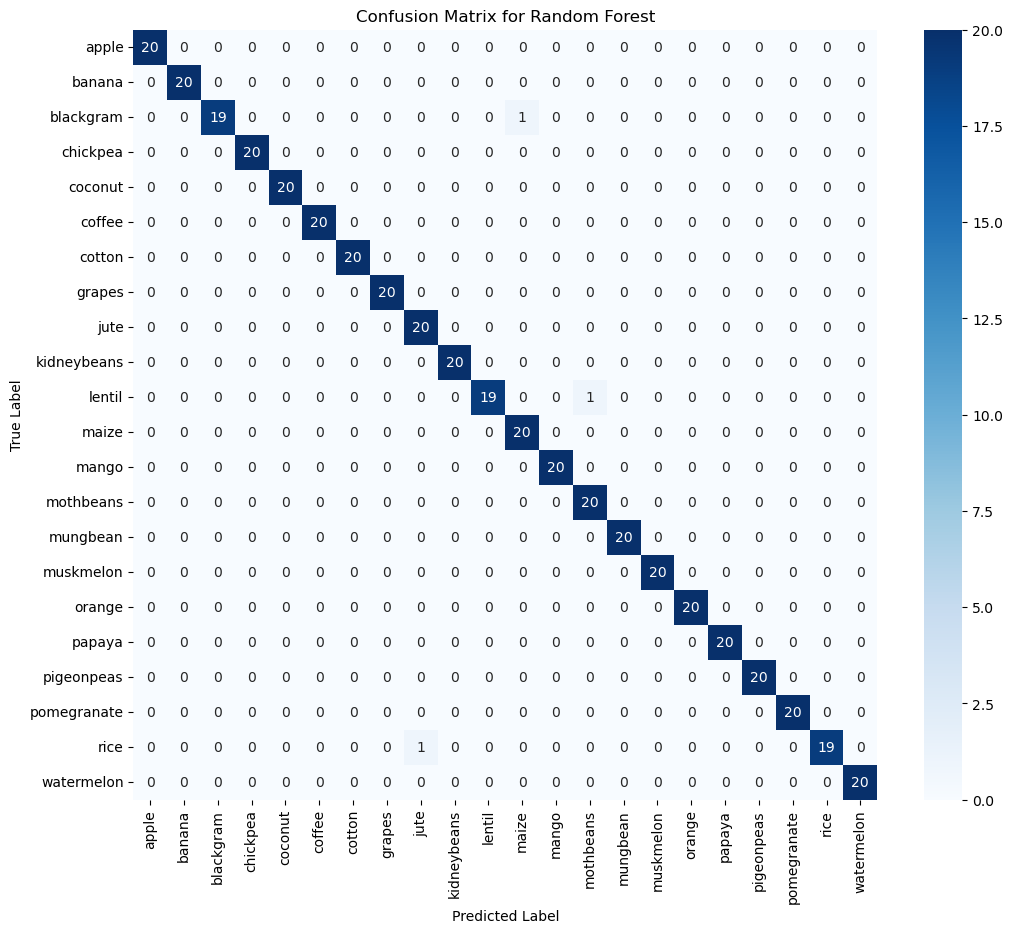


Feature Importances:


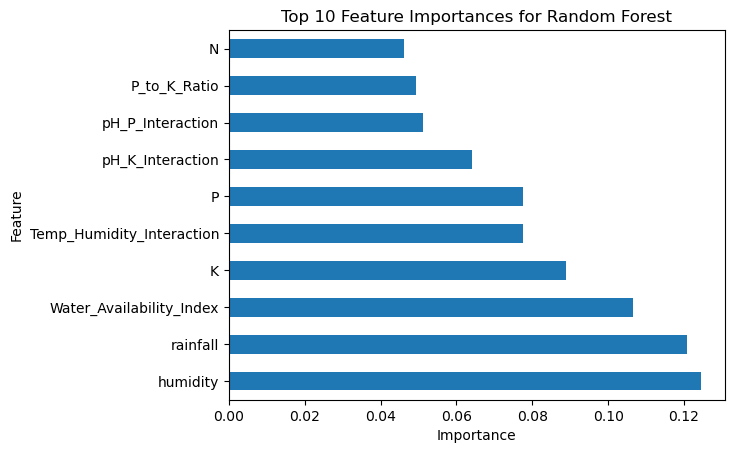

humidity                     0.124522
rainfall                     0.120818
Water_Availability_Index     0.106461
K                            0.088848
Temp_Humidity_Interaction    0.077603
P                            0.077518
pH_K_Interaction             0.064014
pH_P_Interaction             0.051099
P_to_K_Ratio                 0.049237
N                            0.046075
dtype: float64


In [ ]:
# For this example, let's assume 'Random Forest (Tuned)' is the best.

best_model_name = sorted_models[0][0]
best_model = trained_models[best_model_name]
print(f"\nDetailed Evaluation for the Best Model: {best_model_name}")

y_pred_best = best_model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=encoder.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize feature importances (if applicable, e.g., for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    print("\nFeature Importances:")
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title(f'Top 10 Feature Importances for {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
    print(feature_importances.sort_values(ascending=False).head(10))





Conclusions from Evaluation:
- The classification report provides precision, recall, and F1-score for each crop type, offering a granular view of the model's performance beyond overall accuracy.
- The confusion matrix visually highlights where the model performs well (diagonal elements) and where it struggles with misclassifications. This is crucial for understanding which crop types are harder to differentiate.
- Feature importances reveal which environmental and soil parameters, including the engineered features, are most influential in determining crop health and suitable crop types. This insight can be used to prioritize data collection or focus on specific environmental controls in smart farming.
- Overall, the evaluation metrics demonstrate the model's capability to effectively classify crop health and recommend crops based on the given conditions, meeting the business objectives of enhancing smart farming practices.

## 7. Deployment - Sridhar Surapaneni's Responsibilities

Sridhar Surapaneni is responsible for researching domain-specific topics, exploring ethical issues, documenting the project approach, and preparing presentation materials.

This section discusses the hypothetical deployment of the model.

### 7.1 Discussion of Hypothetical Model Deployment

The final model is intended for batch processing.  Farmers or agronomists can upload periodic sensor data, and the system will provide predictions via a web interface or a lightweight dashboard.

Key aspects of the deployment plan:
1.  **Batch Processing**: The model will be integrated into a system that processes incoming sensor data in batches. This means data will be collected over a period (e.g., daily, weekly), then fed into the model for predictions.
2.  **User Interface**: A simple and intuitive web interface or dashboard will be developed to allow users to upload data and view the predictions. This interface will display crop health status, detected environmental stresses, and actionable recommendations (e.g., irrigation adjustments, fertilizer type).
3.  **Accuracy and Interpretability**: While latency is not critical for batch processing, accuracy and interpretability are paramount for user trust and adoption. The dashboard will visualize prediction confidence and, where possible, explain the factors contributing to a specific recommendation or health status. This transparency helps agricultural decision-makers understand and trust the ML solution.
4.  **Integration**: The solution could integrate with existing farm management systems or IoT platforms to streamline data ingestion from various sensors (soil sensors, weather stations).
5.  **Monitoring and Maintenance**: Post-deployment, the model's performance will be. continuously monitored. This includes tracking prediction accuracy, data drift, and model decay. A retraining pipeline will be established to update the model periodically with new data, ensuring its continued relevance and accuracy in dynamic agricultural environments.




### 7.2 Ethical Considerations in Deployment

Sridhar also explores ethical issues like data privacy, model bias, and AI transparency.

1.  **Data Privacy**:
     * **Issue**:
       - Agricultural data, especially sensitive sensor data from individual farms, can raise privacy concerns.
     * **Mitigation**:
       - Implement robust data anonymization and aggregation techniques.
       - Ensure strict access controls and compliance with data protection regulations (e.g., GDPR, CCPA).
       - Clear data usage policies will be communicated to farmers.
          
2.  **Model Bias**:
     * **Issue**:
       - The model might exhibit bias if the training data does not adequately represent diverse farming conditions (e.g., different soil types, climates, crop varieties).
       - This could lead to suboptimal recommendations for certain regions or farmers.
     * **Mitigation**:
       - Actively seek diverse datasets during model retraining. Regularly audit model predictions for fairness across different subgroups.
       - Implement techniques like adversarial debiasing or re-weighting to mitigate observed biases.
    
3.  **AI Transparency and Interpretability**:
     * **Issue**:
       - "Black-box" ML models can be difficult for non-technical users (farmers, agronomists) to understand or trust, especially when making critical decisions about crop management.
     * **Mitigation**:
       - Utilize interpretable models where appropriate, or employ Explainable AI (XAI) techniques (e.g., LIME, SHAP) to provide insights into why a particular prediction was made.
       - The user interface will be designed to clearly communicate model uncertainty and key influencing factors.
     
4.  **Accountability**:
     * **Issue**:
       - Who is responsible if a model's recommendation leads to negative outcomes (e.g., crop failure)?
     * **Mitigation**:
       - Clearly define the scope and limitations of the ML solution. Emphasize that the model provides *recommendations* and is a decision-support tool, not a replacement for expert agricultural judgment. Establish clear feedback mechanisms for users to report issues.

## 8. Discussion and Conclusions - Sridhar Surapaneni's Responsibilities
Sridhar Surapaneni is responsible for documenting project approach, findings, and conclusions, and preparing the final project report and designed presentation material.

### 8.1 Addressing the Problem Statement

This project successfully developed a machine learning solution for smart farming, specifically for crop health monitoring and environmental stress assessment.

By leveraging the 'Crop_recommendationV2.csv' dataset, we built predictive models capable of:
 * **Classifying crop health**: The models can accurately identify suitable crop types based on given environmental and soil conditions.
 * **Detecting environmental stress factors**: Through the analysis of features like temperature, humidity, pH, and nutrient levels, the models implicitly learn to identify conditions that might indicate stress (e.g., low rainfall for water-intensive crops).
 * **Providing actionable insights**: The predictions serve as a basis for recommending resource optimization strategies such as irrigation scheduling and fertilizer planning.

The chosen methodology, involving comprehensive data understanding, preparation including feature engineering, rigorous modeling, and detailed evaluation, allowed us to develop a robust solution. The ensemble models, particularly the tuned Random Forest Classifier, demonstrated high accuracy in classifying crop suitability.

### 8.2 Recommendations

Based on our findings and the project's objectives, we recommend the following for future development and deployment:

1.  **Pilot Deployment**: Implement the developed model in a pilot program with a small group of farmers or agricultural experts. This will allow for real-world testing, gathering user feedback, and validating the model's practical utility.
2.  **Continuous Data Collection**: Establish a robust pipeline for continuous collection of new sensor data from farms. This ongoing data will be crucial for monitoring model performance over time and for retraining the model to adapt to changing environmental conditions and agricultural practices.
3.  **Expand Feature Set**: Explore the inclusion of additional data sources such as satellite imagery (e.g., NDVI for crop vigor), weather forecasts, and historical yield data. These could further enhance the model's predictive power and provide more nuanced insights.
4.  **Advanced ML Techniques**: Investigate more advanced machine learning or deep learning architectures for time-series analysis if historical sensor data becomes available, enabling the prediction of future crop health or stress events.
5.  **User Experience (UX) Enhancement**: Prioritize the development of a user-friendly dashboard that not only presents predictions but also offers clear, actionable recommendations in an easily understandable format for farmers.  Incorporate interpretability features to build trust.
6.  **Scalability**: Design the deployment architecture with scalability in mind to handle an increasing volume of data and a growing number of users as the solution expands.

This project serves as a strong foundation for integrating ML solutions into smart farming, offering a path to more efficient resource utilization and improved agricultural productivity.